In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
#import missingno as mano
%matplotlib inline
plt.style.use('seaborn')
import sklearn.datasets as datasets
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split  # 对数据集切分
from sklearn import metrics #import r2_score
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
# 机器算法模型
from sklearn.neighbors import KNeighborsRegressor  # KNN，即K近邻算法
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression  # 多元线性回归算法
from sklearn.linear_model import Ridge  # 线性回归算法Ridge回归，岭回归
from sklearn.linear_model import Lasso  # 线性回归算法Lasso回归，可用作特征筛选
from sklearn.tree import DecisionTreeRegressor  # 决策树，既可以做分类也可以做回归（本文主要用于分类问题）
from sklearn.svm import SVR  # 支持向量机
sns.set_style("whitegrid")

In [5]:
train = pd.read_csv("E:/文件/深度学习12个项目实践/数据集/titanic.csv")
train
d1={'male':0,'female':1}
d2={'S':1,'C':2,'Q':3}
train['Sex']=train['Sex'].map(d1)
train['Embarked']=train['Embarked'].map(d2)
#target = train.Survived
Survived = train["Survived"] 
train['Age'].fillna(train.Age.median(),inplace=True)
#train['Embarked'].fillna(train.Embarked.median(),inplace=True)
Test = train[["Pclass","Fare","SibSp","Parch","Age","Sex"]]#"Ticket","Fare","Cabin","Embarked"]]
encoder = LabelEncoder()
Survived = encoder.fit_transform(Survived)
x_train, x_test, y_train, y_true = train_test_split(Test,Survived,test_size=0.197,random_state=150) 
x_train, x_test, y_train, y_true 

(     Pclass     Fare  SibSp  Parch   Age  Sex
 362       3  14.4542      0      1  45.0    1
 176       3  25.4667      3      1  28.0    0
 105       3   7.8958      0      0  28.0    0
 482       3   8.0500      0      0  50.0    0
 725       3   8.6625      0      0  20.0    0
 ..      ...      ...    ...    ...   ...  ...
 496       1  78.2667      1      0  54.0    1
 25        3  31.3875      1      5  38.0    1
 507       1  26.5500      0      0  28.0    0
 442       3   7.7750      1      0  25.0    0
 228       2  13.0000      0      0  18.0    0
 
 [715 rows x 6 columns],
      Pclass     Fare  SibSp  Parch   Age  Sex
 633       1   0.0000      0      0  28.0    0
 489       3  15.9000      1      1   9.0    0
 765       1  77.9583      1      0  51.0    1
 479       3  12.2875      0      1   2.0    1
 285       3   8.6625      0      0  33.0    0
 ..      ...      ...    ...    ...   ...  ...
 862       1  25.9292      0      0  48.0    1
 43        2  41.5792      1     

In [6]:
# for K in ['manhattan','euclidean','minkowski','chebyshev']
KNmodel = KNeighborsClassifier(algorithm= 'auto',
                                           leaf_size = 14,
                                           metric = 'chebyshev',
                                           metric_params = None,
                                           n_jobs=-1,
                                           n_neighbors = 29,
                                           #p=1,
                                           weights = 'distance')
KNmodel.fit(x_train,y_train)
pre_kN = KNmodel .predict(x_test)
acc_KN = metrics.accuracy_score(pre_kN,y_true)
print (acc_KN)

0.8181818181818182


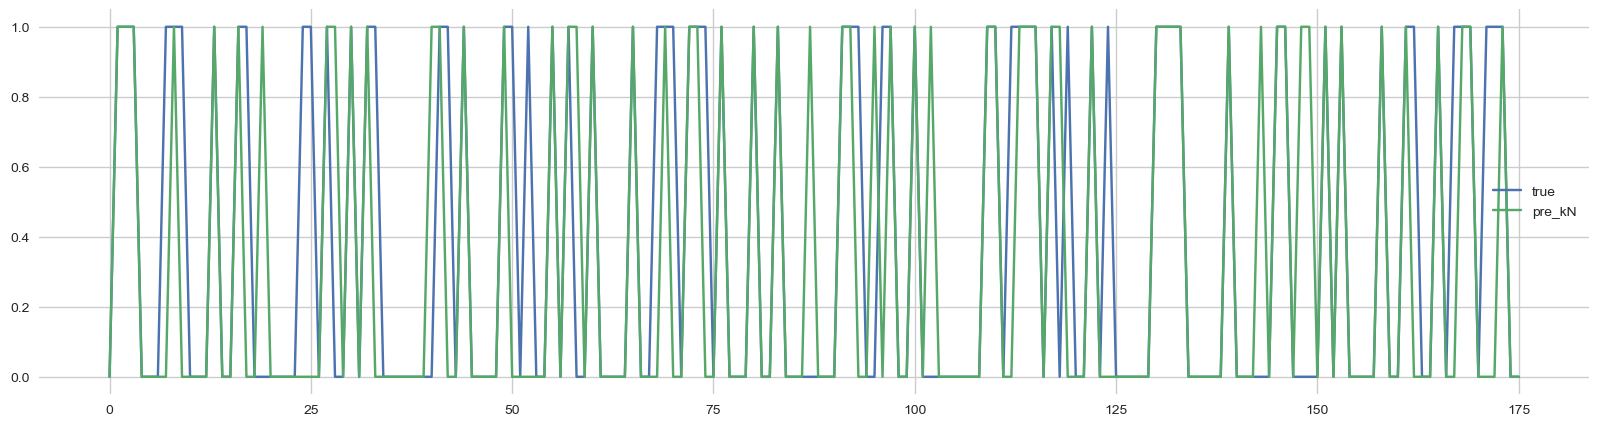

In [7]:
plt.figure(figsize=(20, 5))
plt.plot(y_true, label='true')
plt.plot(pre_kN, label='pre_kN')
plt.legend()
plt.show()